 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, root_dir)

In [2]:
import random
import numpy as np
import pandas as pd
from lib.node import Node
from lib.tree import Tree

In [3]:
file_path = '../data/research/sonar.all-data.csv'
df = pd.read_csv(file_path, header=None)

In [4]:
ls = [x for x in range(60)]
dummy = Node(df, [1,2,2,7,4,5,200,150, 175, 175, 130], ls, 0, 4)
dummy.split()

In [5]:
nodes = [dummy]
while(len(nodes) > 0):
    new_nodes = []
    level_str = ''
    for node in nodes:
        level_str += str(node) + "\n"
        if node.left:
            new_nodes.append(node.left)
        if node.right:
            new_nodes.append(node.right)
    print(level_str+"\n--------------------------------------------------", end='\n')
    nodes = new_nodes

[7687212717, 0.49586776859504145, 11, 1, 0.0453, [('l', 1594472436), ('r', 1332697140)]]

--------------------------------------------------
[1594472436, 0.0, 5, None, None, []]
[1332697140, 0.0, 6, None, None, []]

--------------------------------------------------


In [6]:
ls = [x for x in range(60)]
tree = Tree(df, 3, None, range(df.shape[0]-20), ls)
tree.fit()

In [7]:
print(tree.visualize())

digraph Tree {
node [shape=box];
2974850473 [label="X[10] < 0.1734
gini = 0.3866231853353914
samples = 188
distribution = [74, 114]"];
7062461470 [label="X[3] < 0.0525
gini = 0.1908688349366316
samples = 74
distribution = [59, 15]"];
2974850473 -> 7062461470 [labeldistance=8, labelangle=30, xlabel="True"]
1125776940 [label="X[44] < 0.2662
gini = 0.3526099198613819
samples = 114
distribution = [81, 33]"];
2974850473 -> 1125776940 [labeldistance=8, labelangle=-30, xlabel="False"]
2417634809 [label="X[0] < 0.0412
gini = 0.06541778174249183
samples = 59
distribution = [57, 2]"];
7062461470 -> 2417634809 [labeldistance=8, labelangle=30, xlabel="True"]
1762320756 [label="X[44] < 0.1675
gini = 0.1904761904761905
samples = 15
distribution = [7, 8]"];
7062461470 -> 1762320756 [labeldistance=8, labelangle=-30, xlabel="False"]
9402639856 [label="X[35] < 0.5564
gini = 0.35099715099715095
samples = 81
distribution = [65, 16]"];
1125776940 -> 9402639856 [labeldistance=8, labelangle=30, xlabel="True"

In [12]:
%%bash
dot -Tpng tree.dot -o tree.png
dot -Tsvg tree.dot -o tree.svg

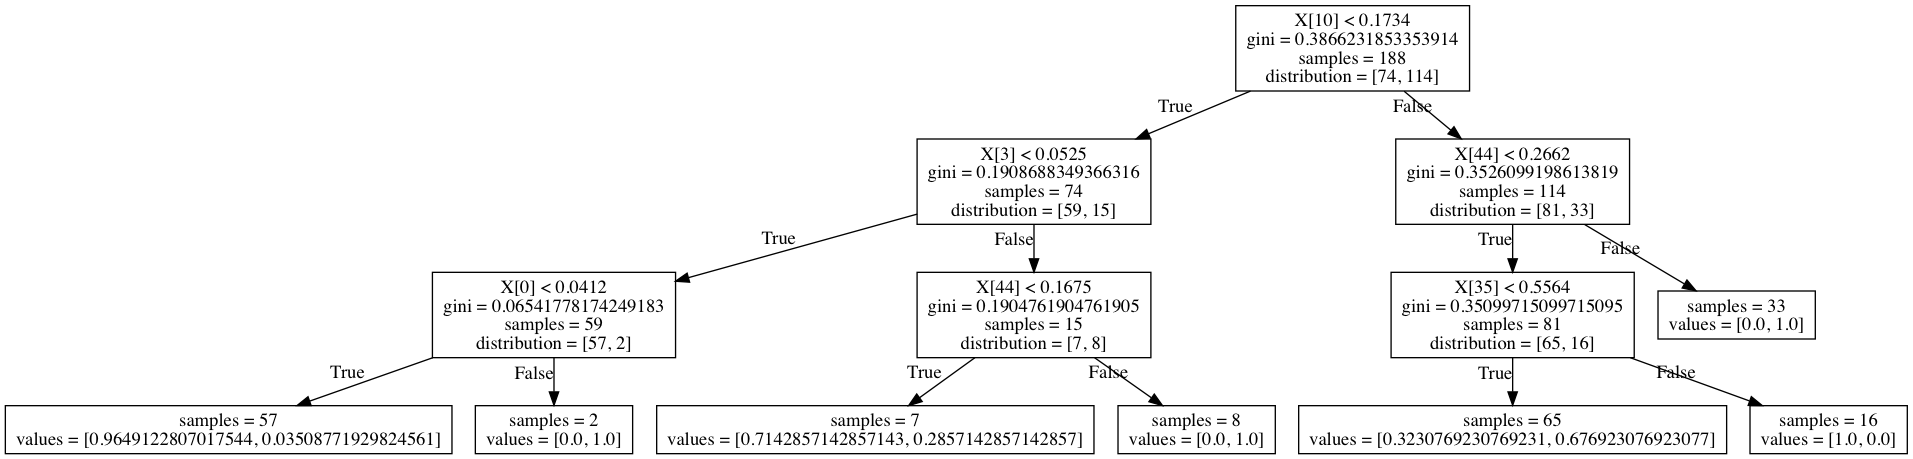

In [13]:
from IPython.display import Image
Image(filename='tree.png')